<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv

--2023-06-18 09:34:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28140171 (27M) [text/csv]
Saving to: ‘m2_survey_data.csv’

m2_survey_data.csv  100%[===================>]  26.84M   914KB/s    in 33s     

2023-06-18 09:35:05 (821 KB/s) - ‘m2_survey_data.csv’ saved [28140171/28140171]



Load the dataset into a dataframe.


In [2]:
df = pd.read_csv('/Users/bottgabriel/Downloads/m2_survey_data.csv')

In [11]:
# Import neccessary libraries
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


/var/folders/tk/7d_vrjm12r7b1c3wp2jr8kxw0000gn/T/ipykernel_80304/3117693883.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['ConvertedComp'])


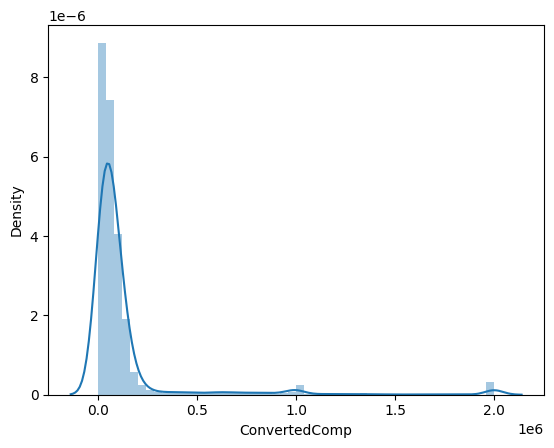

In [12]:
# your code goes here
ax1 = sns.distplot(df['ConvertedComp'])
ax1.set_xlabel('ConvertedComp')
plt.show()

Plot the histogram for the column `ConvertedComp`.


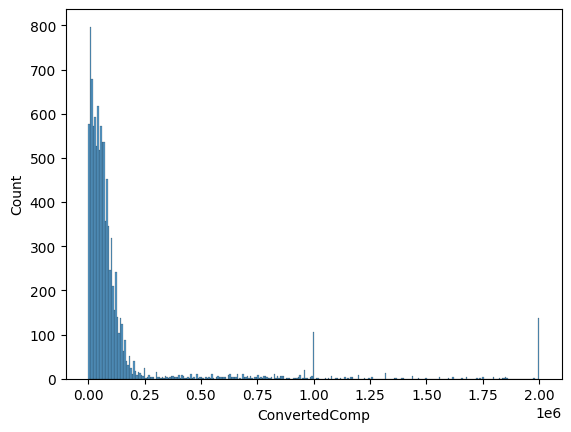

In [13]:
# your code goes here
ax2 = sns.histplot(df['ConvertedComp'])
ax2.set_xlabel('ConvertedComp')
plt.show()

What is the median of the column `ConvertedComp`?


In [14]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [20]:
# your code goes here
df[df['Gender'] == 'Man'].shape[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [22]:
# your code goes here
df[df['Gender'] == 'Woman'].ConvertedComp.median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [23]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


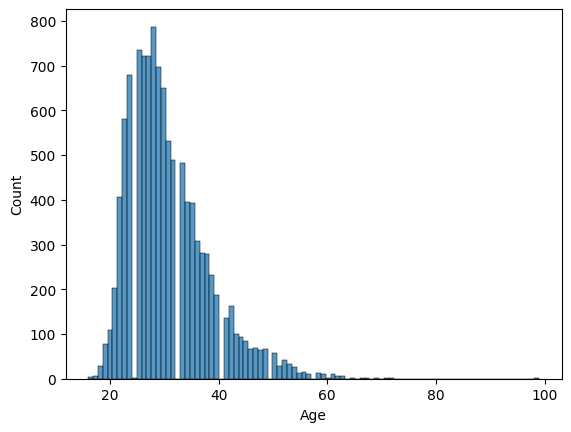

In [24]:
# your code goes here
ax3 = sns.histplot(df['Age'])
ax3.set_xlabel('Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


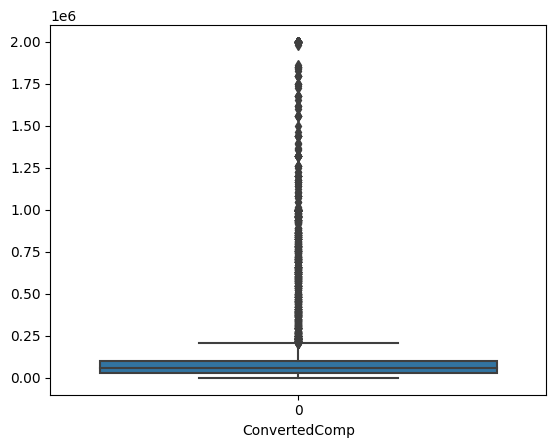

In [25]:
# your code goes here
ax4 = sns.boxplot(df['ConvertedComp'])
ax4.set_xlabel('ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [26]:
# your code goes here
q3=df['ConvertedComp'].quantile(0.75)
q1=df['ConvertedComp'].quantile(0.25)

inter_quartile_range = q3 - q1
inter_quartile_range

73132.0

Find out the upper and lower bounds.


In [28]:
# your code goes here
print(f"Upper bound is {q3}, Lower bound is {q1}")

Upper bound is 100000.0, Lower bound is 26868.0


Identify how many outliers are there in the `ConvertedComp` column.


In [30]:
# your code goes here
lower_fence = q1 - (1.5 * inter_quartile_range)
upper_fence = q3 + (1.5 * inter_quartile_range)

outliers = (df['ConvertedComp'] < lower_fence) | (df['ConvertedComp'] > upper_fence)
outliers.value_counts()

ConvertedComp
False    10519
True       879
Name: count, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [31]:
# your code goes here
new_df = df[~((df.ConvertedComp < lower_fence) | (df.ConvertedComp > upper_fence))]
new_df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat l

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [39]:
# your code goes here
numeric_columns = df.select_dtypes(include='number')
numeric_columns.corr()['Age'].to_frame()

,Age
Respondent,0.004041
CompTotal,0.006970
ConvertedComp,0.105386
WorkWeekHrs,0.036518
CodeRevHrs,-0.020469
Age,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
